풍력 : 바람의 에너지를 변환시켜 전기를 생산하는 설비

https://www.knrec.or.kr/biz/introduce/new_policy/statistics.do?gubun=A

In [1]:
# koreanize-matplotlib 라이브러리 설치
%pip install koreanize-matplotlib -q

# matplotlib 라이브러리, matplotlib에서 한글을 사용하기 위한 라이브러리 임포트
import koreanize_matplotlib

You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# 1. 공모전 추천 데이터

In [2]:
import pandas as pd

# 파일 경로 설정
wind_power_file = '../wind_data/한국남부발전(주)_한경풍력 일별 발전량_20250228.csv'
wind_speed_file = '../wind_data/한국남부발전(주)_한경풍력 일평균 풍속데이터_20250228.csv'
facility_file = '../wind_data/한국남부발전(주)_에너지원별 신재생에너지 발전설비 현황_20250312.csv'

# CSV 파일 불러오기
df_power = pd.read_csv(wind_power_file, encoding='euc-kr')
df_wind = pd.read_csv(wind_speed_file, encoding='euc-kr')
df_facility = pd.read_csv(facility_file, encoding='euc-kr')

# 데이터 확인
print("발전량 데이터")
display(df_power.head())

print("풍속 데이터")
display(df_wind.head())

print("설비 현황 데이터")
# 공백 제거 후 풍력 필터링
df_facility['에너지원'] = df_facility['에너지원'].str.replace(" ", "")
df_facility = df_facility[df_facility['에너지원'] == '풍력']
# print(df_facility["에너지원"].unique())
display(df_facility.head())

발전량 데이터


,구분,한경1호기(kWh),한경2호기(kWh),한경3호기(kWh),한경5호기(kWh),한경6호기(kWh),한경7호기(kWh),한경8호기(kWh),한경9호기(kWh)
0,2018-01-01,16001,17281,15139,0,24508,5872,4592,28460
1,2018-01-02,8173,6611,9935,0,21904,19780,12032,11704
2,2018-01-03,21213,33000,29205,0,54872,51956,35248,60116
3,2018-01-04,20925,21889,18492,0,35036,33488,0,37224
4,2018-01-05,24439,25177,23986,0,41256,39212,0,44996


풍속 데이터


,구분,한경1호기,한경2호기,한경3호기,한경5호기,한경6호기,한경7호기,한경8호기,한경9호기
0,2018-01-01,7.7,7.9,7.4,6.5,8.2,7.5,7.8,8.8
1,2018-01-02,6.4,5.8,6.4,6.6,8.1,7.8,7.7,6.1
2,2018-01-03,10.2,10.9,9.9,9.6,11.9,11.7,11.3,12.6
3,2018-01-04,8.7,8.9,8.0,7.9,9.5,9.5,8.7,9.8
4,2018-01-05,9.3,9.4,9.1,7.4,10.2,10.4,8.8,10.6


설비 현황 데이터


,에너지원,구분,발전소명,용량(MW),준공년도,비 고
0,풍력,자체,한경풍력 1단계(1~4호기),6.0,2004,FIT
1,풍력,자체,한경풍력 2단계(5~9호기),15.0,2007,FIT
2,풍력,자체,성산풍력 1단계(1~6호기),12.0,2009,FIT
3,풍력,자체,성산풍력 2단계(7~10호기),8.0,2010,RPS
4,풍력,SPC,태백풍력(1~9호기),18.0,2012,RPS


# 2. 추가 조사 데이터

In [3]:
wind_location_file = '../wind_data/한국에너지공단_풍력기 위치정보_20221231.csv'
df_location = pd.read_csv(wind_location_file, encoding='euc-kr')
display(df_location.head())

,단지번호,단지명,풍력기번호(임시),준공일,분류,주소,엑스좌표(GRS80_C_x),와이좌표(GRS80_C_y),위도(lat),경도(lon)
0,1,행원,1,2013-11-01,육상,제주특별자치도 제주시 구좌읍 해맞이해안로 712-3 (제주대 660),106838.4045,183229.7698,33.555172,126.819410
1,1,행원,2,2013-11-01,육상,제주특별자치도 제주시 구좌읍 해맞이해안로 712-3 (제주대 660),107052.4405,183350.5829,33.557103,126.820707
2,1,행원,3,2013-11-01,육상,제주특별자치도 제주시 구좌읍 해맞이해안로 712-3 (제주대 660),107248.6057,183390.2459,33.558873,126.821130
3,1,행원,4,2013-11-01,육상,제주특별자치도 제주시 구좌읍 해맞이해안로 712-3 (제주대 660),107211.4283,183671.6151,33.558542,126.824161
4,1,행원,5,2013-11-01,육상,제주특별자치도 제주시 구좌읍 해맞이해안로 712-3 (제주대 660),106419.0255,183513.3681,33.551395,126.822472


In [4]:
len(df_location)

780

# EDA 

## (1) 결측치 확인

In [5]:
def print_missing_columns(df, df_name="데이터프레임"):
    null_counts = df.isnull().sum()
    missing_cols = null_counts[null_counts > 0]
    
    if missing_cols.empty:
        print(f"{df_name}에는 결측치가 없습니다.")
    else:
        print(f"{df_name} 중 결측치가 있는 컬럼:")
        for col, count in missing_cols.items():
            print(f"  - {col} ({count}개)")

print_missing_columns(df_power, "df_power")
print_missing_columns(df_wind, "df_wind")
print_missing_columns(df_facility, "df_facility")

df_power에는 결측치가 없습니다.
df_wind에는 결측치가 없습니다.
df_facility에는 결측치가 없습니다.


## (2) 날짜 범위 일치 여부

In [6]:
print(df_power['구분'].min(), df_power['구분'].max())
print(df_wind['구분'].min(), df_wind['구분'].max())

2018-01-01 2025-02-28
2018-01-01 2025-02-28


## (3) 발전량/풍속 값 이상치 (음수, 0값, 극단값 등)

In [7]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
# 발전량 데이터: 일자별 터빈별 long-form 변환
df_power['일자'] = pd.to_datetime(df_power['구분'])
df_power_melted = df_power.drop(columns='구분').melt(id_vars='일자', var_name='터빈', value_name='발전량(kWh)')

# 풍속 데이터: 일자별 터빈별 long-form 변환
df_wind['일자'] = pd.to_datetime(df_wind['구분'])
df_wind_melted = df_wind.drop(columns='구분').melt(id_vars='일자', var_name='터빈', value_name='풍속(m/s)')

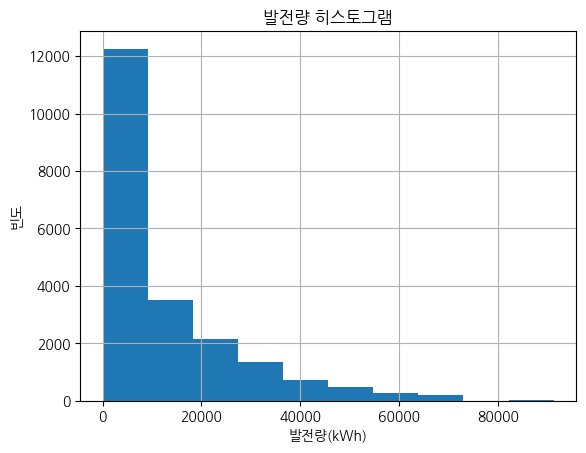

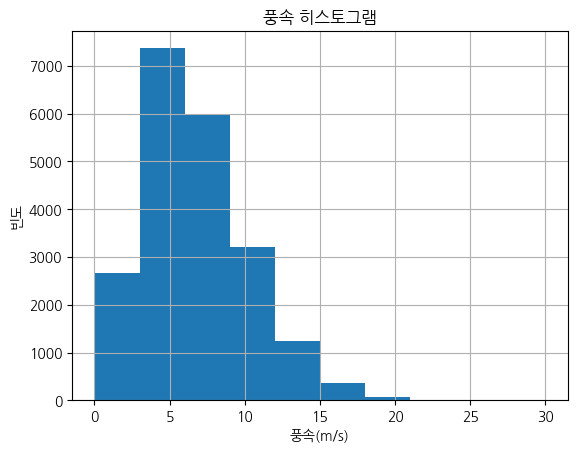

In [9]:
import matplotlib.pyplot as plt

# 발전량 히스토그램
df_power_melted['발전량(kWh)'].hist()
plt.xlabel('발전량(kWh)')
plt.ylabel('빈도')
plt.title('발전량 히스토그램')
plt.show()

# 풍속 히스토그램
df_wind_melted['풍속(m/s)'].hist()
plt.xlabel('풍속(m/s)')
plt.ylabel('빈도')
plt.title('풍속 히스토그램')
plt.show()

## (4) 풍속 ↔ 발전량 산점도 (전체)

In [10]:
%pip install seaborn -q

You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
print("df_power_melted 컬럼:", df_power_melted.columns.tolist())
print("df_wind_melted 컬럼:", df_wind_melted.columns.tolist())

df_power_melted 컬럼: ['일자', '터빈', '발전량(kWh)']
df_wind_melted 컬럼: ['일자', '터빈', '풍속(m/s)']


In [12]:
print("df_power_melted의 터빈")
print(df_power_melted["터빈"].head())
print()
print("df_wind_melted의 터빈")
print(df_wind_melted["터빈"].head())

df_power_melted의 터빈
0    한경1호기(kWh)
1    한경1호기(kWh)
2    한경1호기(kWh)
3    한경1호기(kWh)
4    한경1호기(kWh)
Name: 터빈, dtype: object

df_wind_melted의 터빈
0    한경1호기
1    한경1호기
2    한경1호기
3    한경1호기
4    한경1호기
Name: 터빈, dtype: object


In [13]:
df_power_melted['터빈'] = df_power_melted['터빈'].str.replace('(kWh)', '', regex=False).str.strip()

In [15]:
# inner join을 통해 '일자' + '터빈' 기준으로 병합
df_merged = pd.merge(df_power_melted, df_wind_melted, on=['일자', '터빈'], how='inner')

# 결과 확인
print("병합된 데이터프레임 (df_merged)")
display(df_merged.head())

병합된 데이터프레임 (df_merged)


,일자,터빈,발전량(kWh),풍속(m/s)
0,2018-01-01,한경1호기,16001,7.7
1,2018-01-02,한경1호기,8173,6.4
2,2018-01-03,한경1호기,21213,10.2
3,2018-01-04,한경1호기,20925,8.7
4,2018-01-05,한경1호기,24439,9.3


<Axes: xlabel='풍속(m/s)', ylabel='발전량(kWh)'>

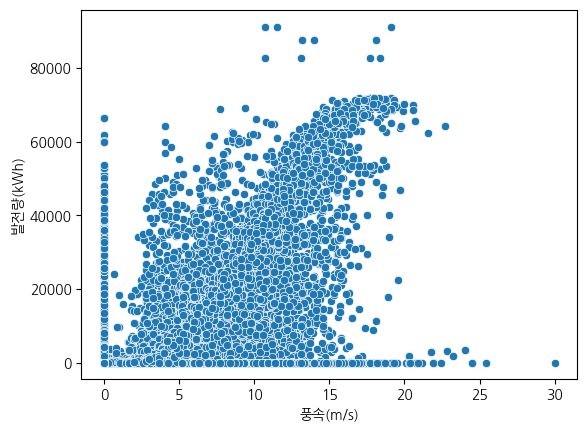

In [16]:
import seaborn as sns
sns.scatterplot(data=df_merged, x='풍속(m/s)', y='발전량(kWh)')

## (5) 터빈별 풍속 ↔ 발전량 패턴 비교

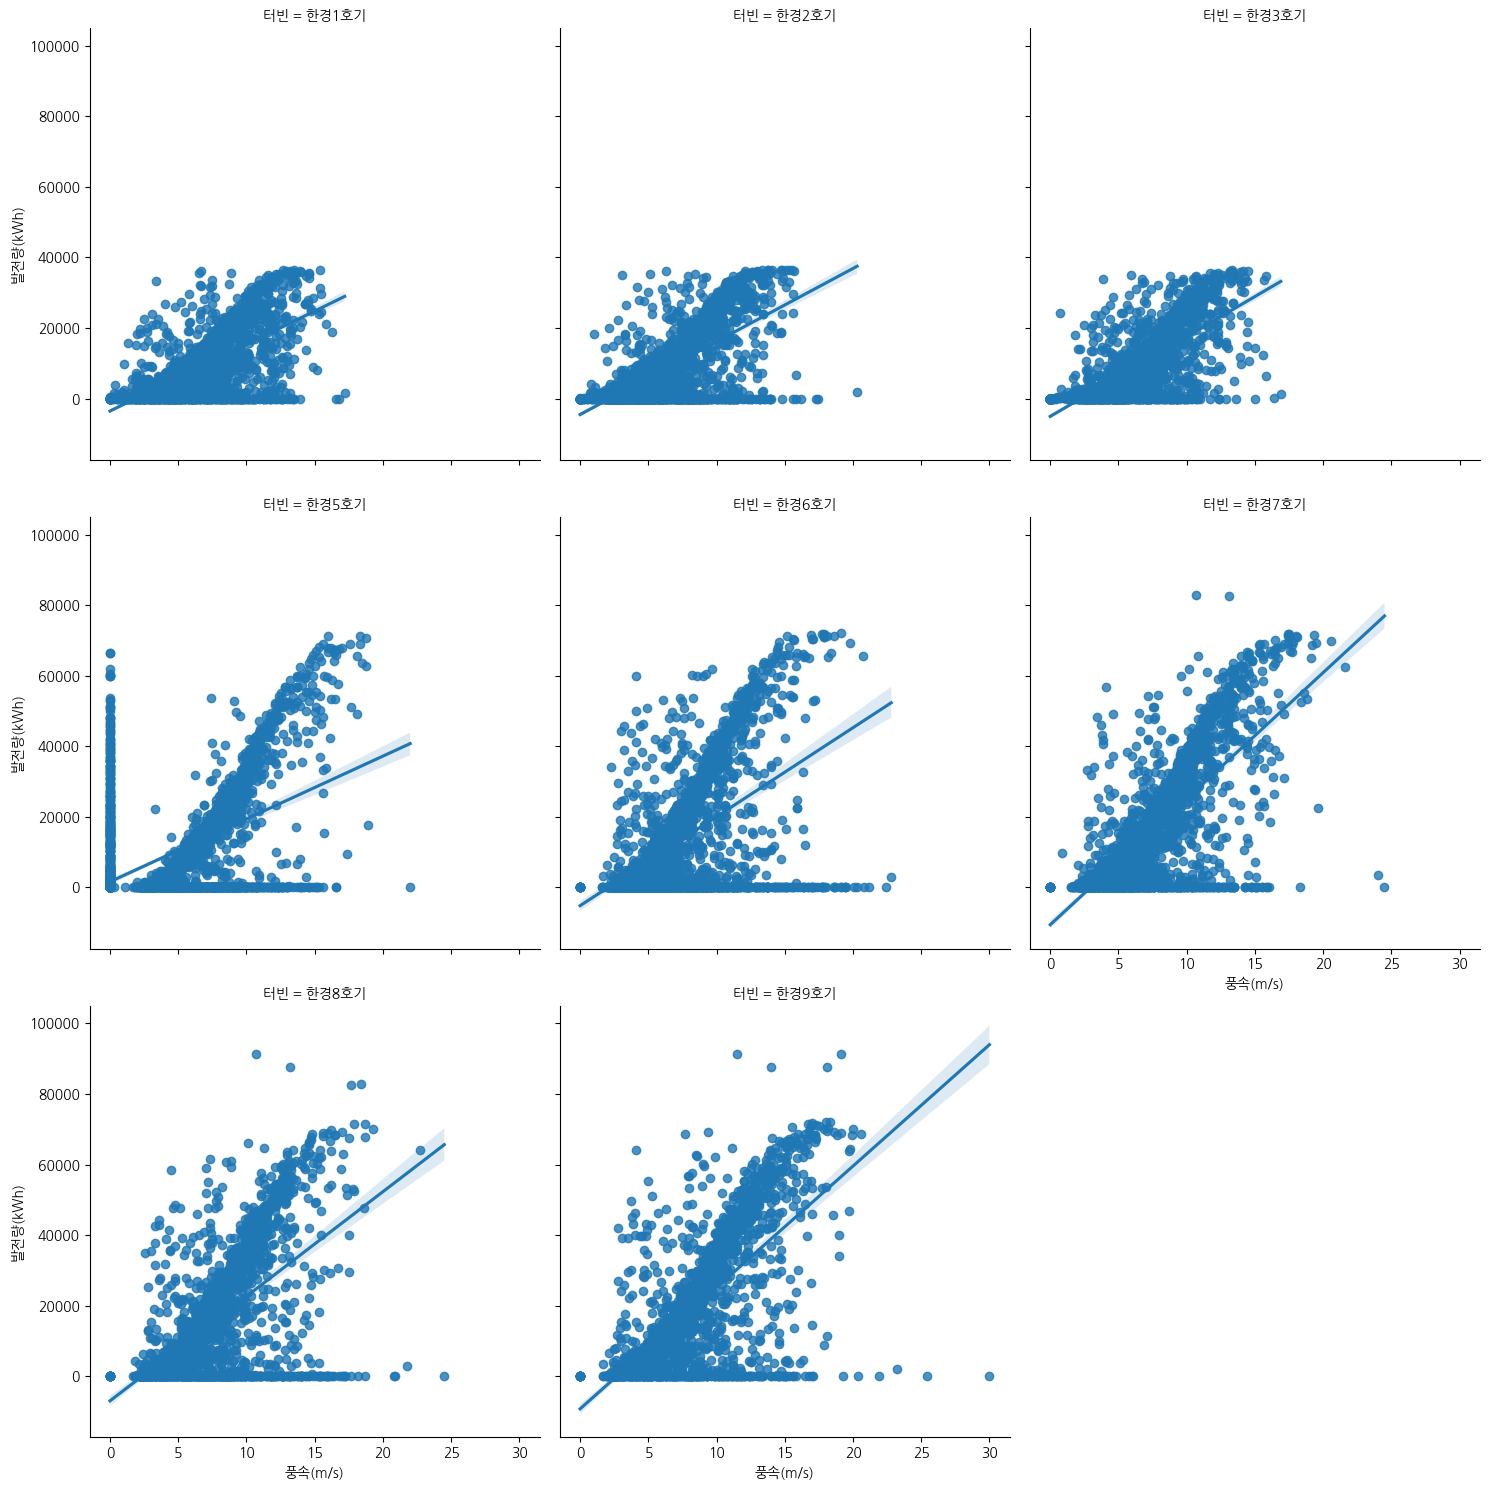

In [ ]:
sns.lmplot(data=df_merged, x='풍속(m/s)', y='발전량(kWh)', col='터빈', col_wrap=3)
# 설비정보(지역, 용량 등) 병합 고려
# lmplot : 추세선(회귀선)을 보여주는 시각화,, 터빈 → 지역/용량/준공년도 매핑 함수

## (6) 풍속³ vs 발전량 → 비선형 확인

In [ ]:
df_merged['풍속^3'] = df_merged['풍속(m/s)'] ** 3
sns.scatterplot(x='풍속^3', y='발전량(kWh)', data=df_merged)

## (7) 지역별 발전량 평균 비교

In [ ]:
df_all.groupby('지역')['발전량(kWh)'].mean().plot(kind='bar')

## (8) 설비 노후도 vs 발전량

In [ ]:
df_all['노후도'] = 2025 - df_all['준공년도']
sns.scatterplot(x='노후도', y='발전량(kWh)', data=df_all)

## (9) 용량 대비 실제 발전량 분석

In [ ]:
df_all['발전효율'] = df_all['발전량(kWh)'] / (df_all['용량(MW)'] * 1000)
sns.boxplot(x='지역', y='발전효율', data=df_all)

## (10) 일자별 발전량 시계열

In [ ]:
df_merged.groupby('일자')['발전량(kWh)'].sum().plot()

## (11) 월별, 계절별 발전량 비교


In [ ]:
df_all['month'] = df_all['일자'].dt.month
sns.boxplot(x='month', y='발전량(kWh)', data=df_all)